<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/cnn/notebooks/Fish_GCMS_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gas Chomatography Mass Spectrometry (GS-MS)

![Gas Chromatrography Mass Spectrometry](https://www.acs.org/content/acs/en/education/whatischemistry/landmarks/gas-chromatography-mass-spectrometry/jcr:content/articleContent/columnsbootstrap_795/column1/textimage/image.img.png/1572464915951.png)

Fig 1. A diagram explaining Gas Chromatography Mass Spectrometry (GS-MS). 

In [ ]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data_path_gdrive = '/content/drive/MyDrive/AI/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_instance(instance):
    """ Load an instance from file. """
    path = os.getcwd()
    folder = "drive/MyDrive/AI/Data"
    file_path = os.path.join(path, folder, instance)
    assert os.path.exists(file_path), f"File at {file_path} does not exist."
    data = pd.read_csv(file_path)

    # Extract the relevant columns - the mass spectometry data. 
    ms_columns = range(2, data.shape[1])
    data = data.iloc[:,ms_columns]
    return data, instance

In [ ]:
def scale_instance(data, instance, verbose=False):
    """ Min-max scale data between 0 and 1. """
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled, columns=data.columns)
    largest_intensity = max(scaled_df.max().tolist())
    assert largest_intensity <= 1.0, f"The largest intensity: {largest_intensity} should be less than or equal to 1."
    smallest_intensity = min(scaled_df.min().tolist())
    assert smallest_intensity >= 0, f"The smallest intensity: {smallest_intensity} should be greater than or equal to 0."
    scaled_df = scaled_df.transpose() # Swap rows and columns for time on x-axis.
    if verbose:
        print(scaled_df.head())
    return scaled_df, instance

In [ ]:
def plot_instance(scaled_df,instance):
    """ Plot a heatmap image of the Snapper Frame instance. """ 
    plt.figure(figsize=(20,10))
    plt.title(f"{instance}")
    plt.xlabel("Timestamp")
    plt.ylabel("Intensity (scaled)")
    ax = sns.heatmap(scaled_df, cmap="Blues")
    ax.invert_yaxis() # Reverse order of y-axis (source: https://bit.ly/3rS2hk6)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


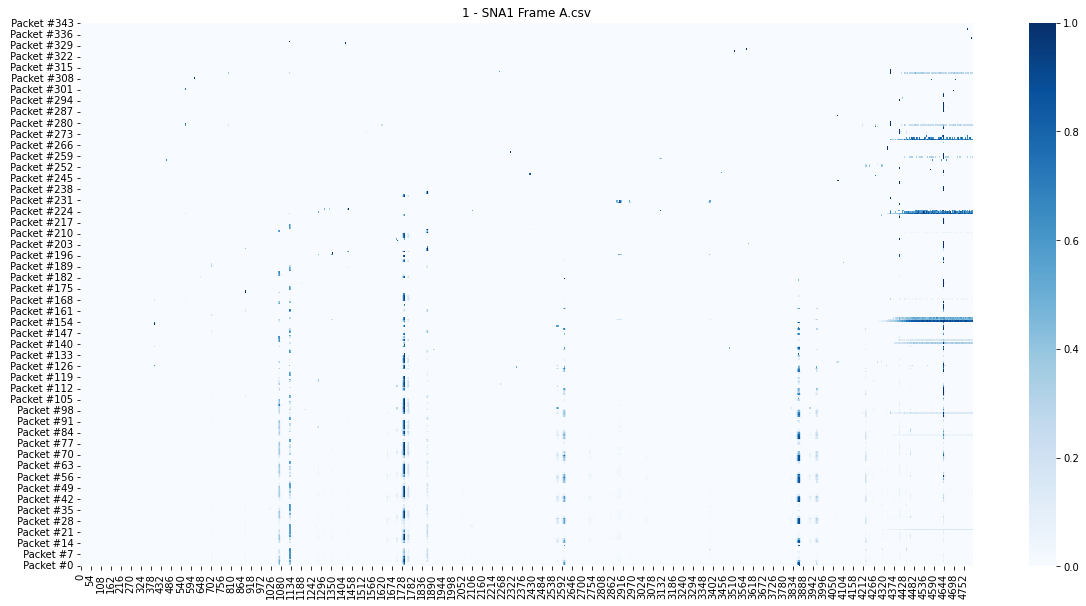

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


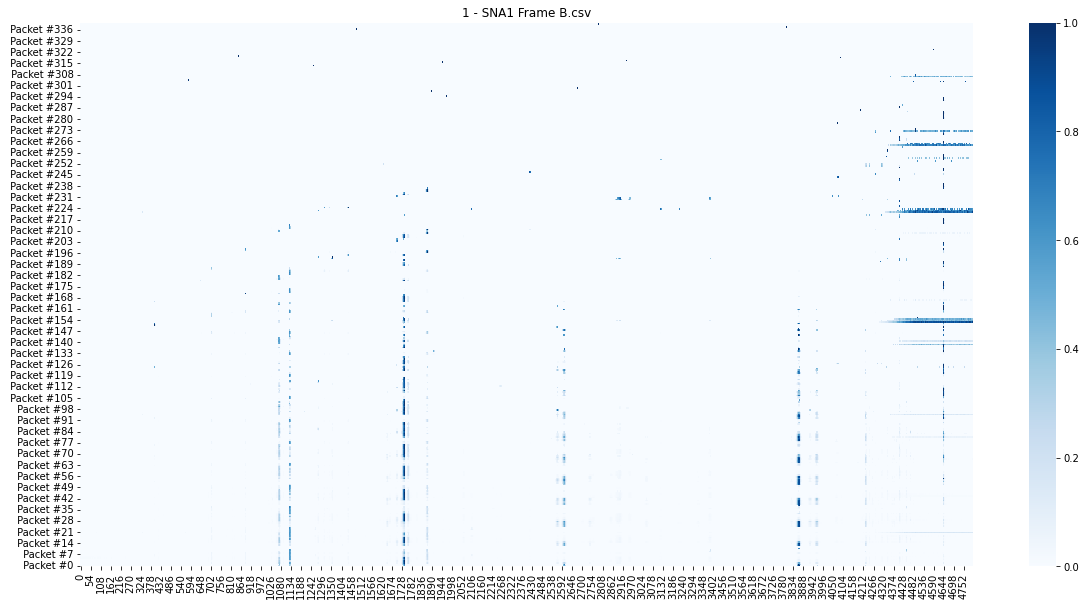

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


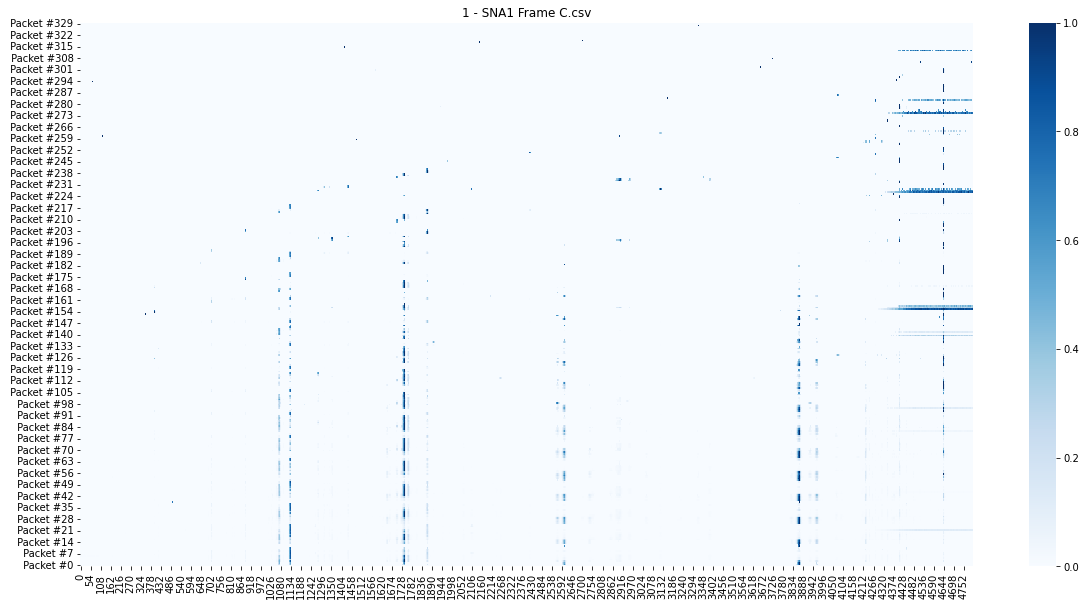

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


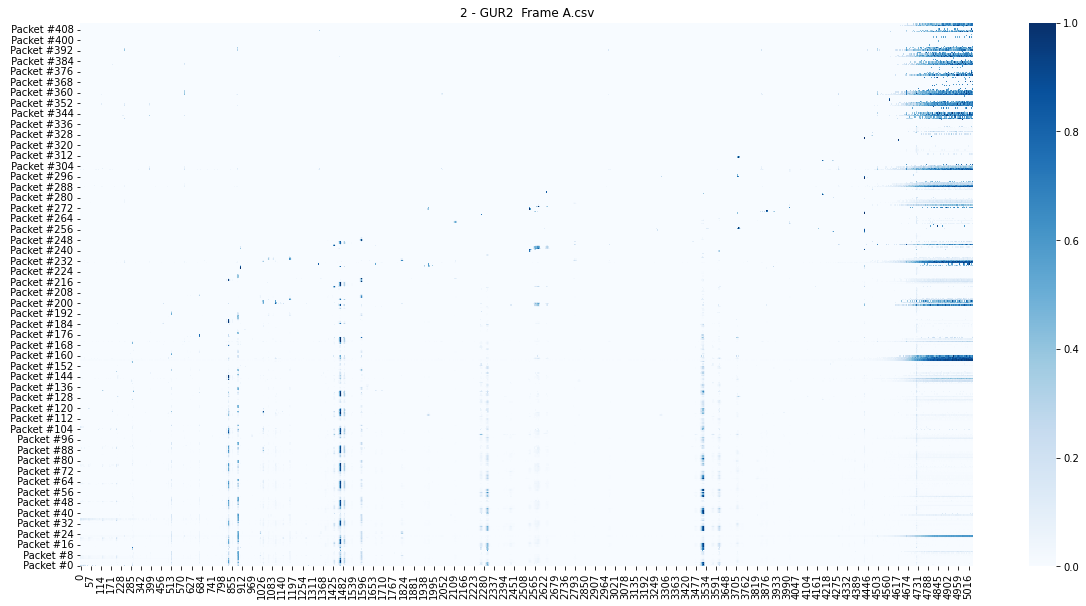

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


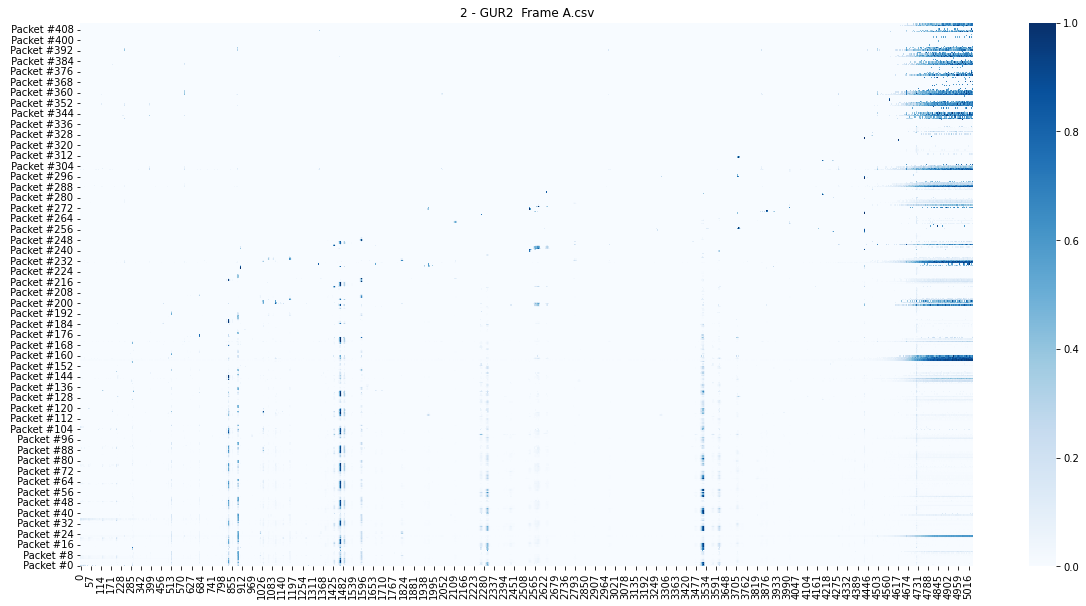

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


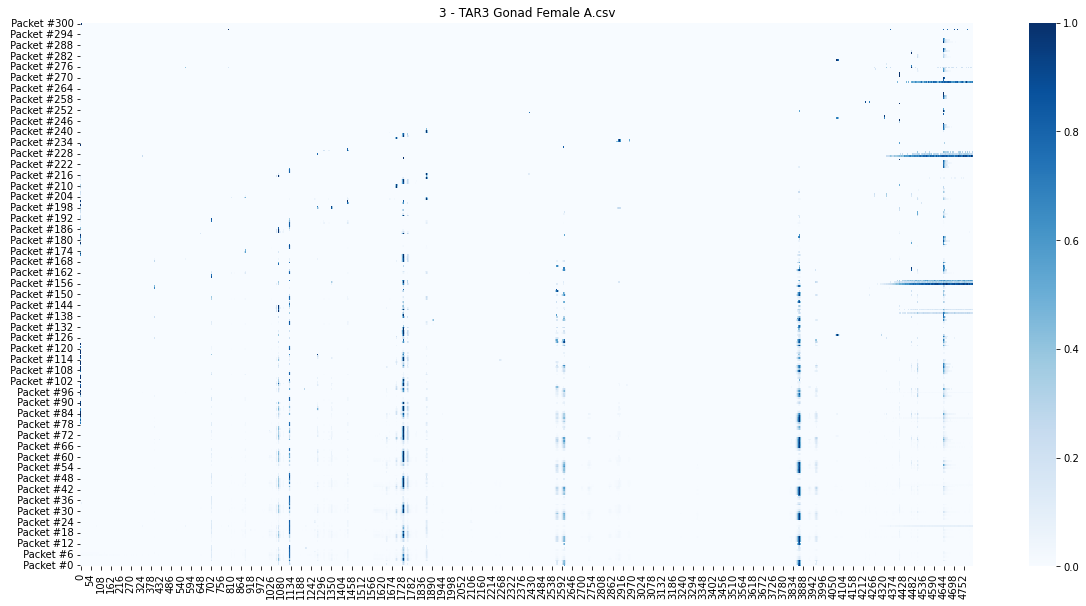

In [20]:
instances = ["1 - SNA1 Frame A.csv", "1 - SNA1 Frame B.csv", "1 - SNA1 Frame C.csv", 
             "2 - GUR2  Frame A.csv", '2 - GUR2  Frame A.csv', 
             '3 - TAR3 Gonad Female A.csv']

for instance in instances:
    plot_instance(*scale_instance(*load_instance(instance)))